In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
## import geometries
# world = gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/smap_gw/data/gis_data/countries/GSHHS_h_L1.shp')


lakes =        gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/smap_gw/data/gis_data/coastlines_boundariesetc/GSHHS_shp/l/GSHHS_l_L2.shp')
world =        gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/smap_gw/data/gis_data/coastlines_boundariesetc/GSHHS_shp/l/GSHHS_l_L1.shp')
world_states = gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/smap_gw/data/gis_data/coastlines_boundariesetc/WDBII_shp/l/WDBII_border_l_L1.shp')

s_props = pd.read_csv('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/model_simulations/soil_props/smap_sprops_montzka_30cm_v1.csv')
modeled_grid = gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/model_simulations/postprocess/modeled_grids/smap_grid_60NS.shp')

In [134]:
fn_fmt = '/storage/coda1/p-rbras6/0/njadidoleslam3/gpm/gpm_condsm_monthly_v1/{month}.hdf'
top_layer_depth = 1000
def smvol2cb(x, theta_r):
    return  x * (top_layer_depth + theta_r * top_layer_depth) - theta_r * top_layer_depth

def myround(x, base=5):
    return base * np.round(x/base)
    
def myround25(x, base=0.025):
    return base * np.round(x/base)

def myround5(x, base=0.025):
    return base * np.round(x/base)
    
def normalize_sm(x, theta_r, theta_s):
    return (x - theta_r) / (theta_s - theta_r)

fn = fn_fmt.format(month='1')
data = pd.read_hdf(fn)
merged = pd.merge(modeled_grid, data, on='grid_xy')
merged_w_sprops  = pd.merge(merged, s_props, on='grid_xy')
init_v0 = np.around(
    myround25(
        smvol2cb(
            merged_w_sprops['init'], merged_w_sprops['theta_r'])/1000
    ),
    3)
# norm_init_sm = np.around(myround25(normalize_sm(init_v0, merged_w_sprops['theta_r'], merged_w_sprops['theta_s'])), 3)
# norm_init_sm = np.around(myround25(normalize_sm(init_v0, merged_w_sprops['theta_r'], merged_w_sprops['theta_s'])), 3)
merged_w_sprops['mean'] = smvol2cb(merged_w_sprops['mean'],merged_w_sprops['theta_r'])/merged_w_sprops['theta_s']/1000
merged_w_sprops['sd'] = merged_w_sprops['sd']/(merged_w_sprops['theta_s']- merged_w_sprops['theta_r'])
def myround75(x, base=0.075):
    return base * np.round(x/base)
norm_init_sm = np.around(myround75(normalize_sm(init_v0, merged_w_sprops['theta_r'], merged_w_sprops['theta_s'])), 3)

merged_w_sprops['init_v0'] = norm_init_sm




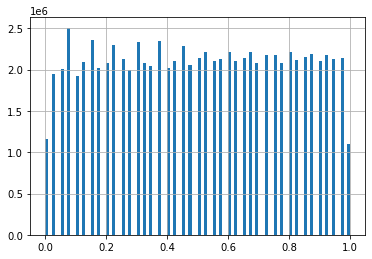

In [152]:
def myround5(x, base=0.075):
    return base * np.round(x/base)
# norm_init_sm = np.around(myround5(normalize_sm(init_v0, merged_w_sprops['theta_r'], merged_w_sprops['theta_s'])), 3)
_ = merged_w_sprops['init_v0'].hist(bins=100)

In [126]:
len(merged_w_sprops['grid_xy'].unique())

1473051

In [133]:
for init in np.sort(norm_init_sm.unique()):
    print(init, norm_init_sm[norm_init_sm == init].count()/4)


0.0 775324.0
0.075 1608725.0
0.15 1618144.0
0.225 1629066.0
0.3 1604040.0
0.375 1602634.0
0.45 1614081.0
0.525 1615290.0
0.6 1611301.0
0.675 1607239.0
0.75 1610123.0
0.825 1618516.0
0.9 1617668.0
0.975 1344356.0


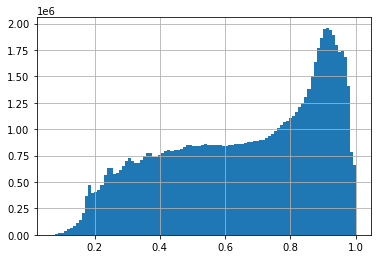

In [89]:
norm_mean = merged_w_sprops['mean']
_ = norm_mean.hist(bins=100)

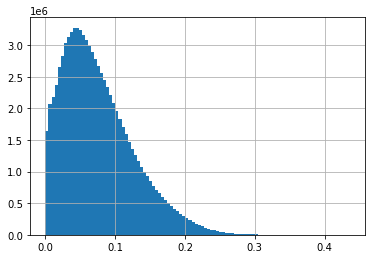

In [90]:
norm_sd = merged_w_sprops['sd']
_ = norm_sd.hist(bins=100)

# California

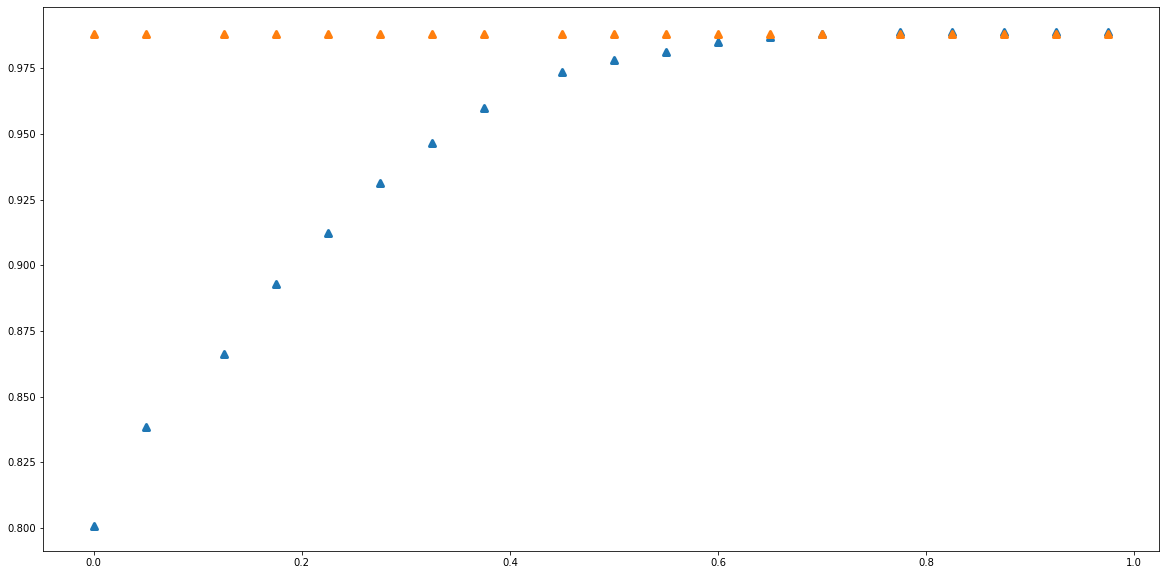

In [137]:

test_pixel = 112910837
subset = merged_w_sprops[merged_w_sprops['grid_xy'] == test_pixel]

fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    
    idx_ds = np.in1d(subset['stage'],ds)
            
    ax.scatter(subset['init_v0'][idx_ds],\
            subset['mean'][idx_ds],  marker='^', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

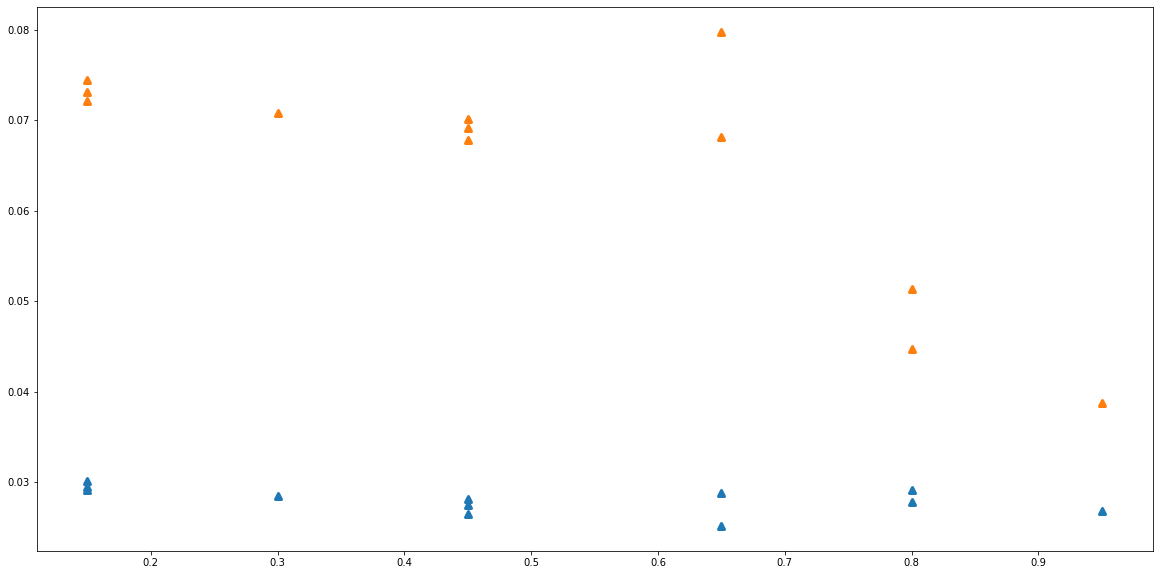

In [ ]:

test_pixel = 106460323
subset = merged_w_sprops[merged_w_sprops['grid_xy'] == test_pixel]

fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    
    idx_ds = np.in1d(subset['stage'],ds)
            
    ax.scatter(subset['init_v0'][idx_ds],\
            subset['sd'][idx_ds],  marker='^', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

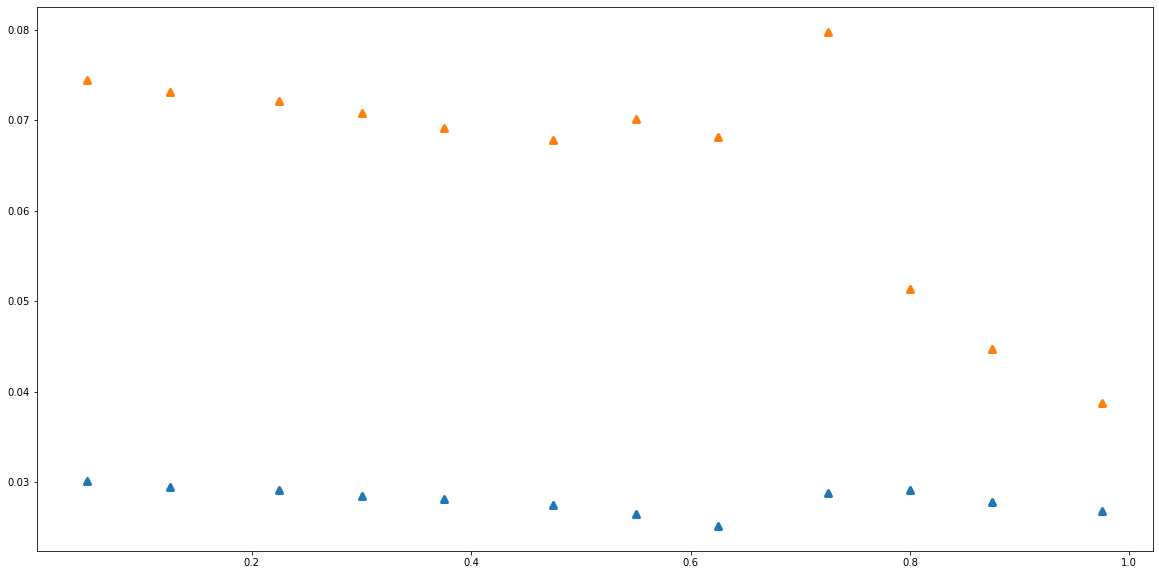

In [ ]:

test_pixel = 106460323
subset = merged_w_sprops[merged_w_sprops['grid_xy'] == test_pixel]

fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    
    idx_ds = np.in1d(subset['stage'],ds)
            
    ax.scatter(subset['init_v0'][idx_ds],\
            subset['sd'][idx_ds],  marker='^', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

In [97]:
merged_w_sprops

25590252    0.050
25590253    0.125
25590254    0.225
25590255    0.300
25590256    0.375
25590257    0.475
25590258    0.550
25590259    0.625
25590260    0.725
25590261    0.800
25590262    0.875
25590263    0.975
Name: init_v0, dtype: float64

# Amazon

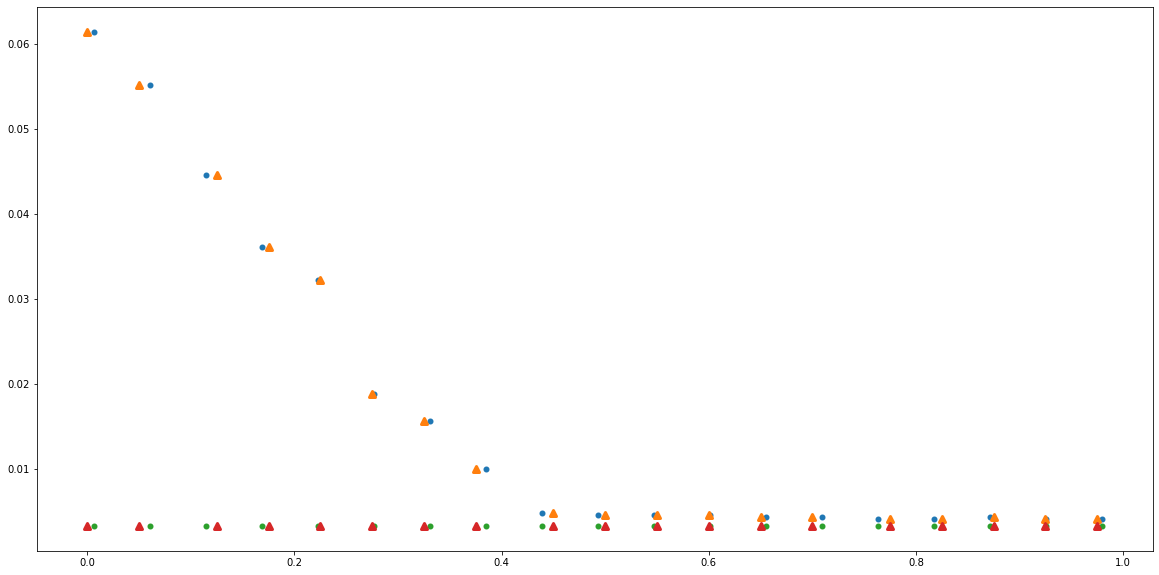

In [76]:

test_pixel = 112910837
# subset = merged_w_sprops[merged_w_sprops['grid_xy'] == test_pixel]

fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    
    idx_ds = np.in1d(merged_w_sprops['stage'],ds)
            
    ax.scatter(norm_init_sm[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)],\
            norm_sd[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)],  marker='.', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
    ax.scatter(myround1(norm_init_sm[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)]),\
            norm_sd[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)],  marker='^', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

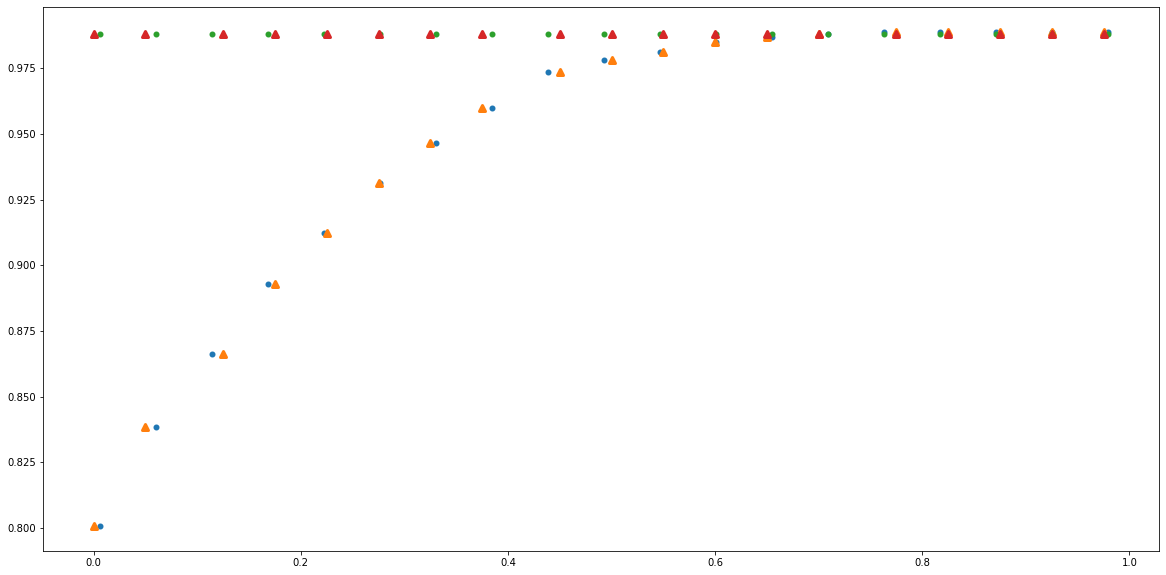

In [77]:

test_pixel = 112910837
# subset = merged_w_sprops[merged_w_sprops['grid_xy'] == test_pixel]

fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    
    idx_ds = np.in1d(merged_w_sprops['stage'],ds)
            
    ax.scatter(norm_init_sm[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)],\
            norm_mean[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)],  marker='.', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
    ax.scatter(myround1(norm_init_sm[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)]),\
            norm_mean[idx_ds & (merged_w_sprops['grid_xy'] == test_pixel)],  marker='^', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

# initial coditions

In [91]:
merged_w_sprops['init_v0'].unique()

array([0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275,
       0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.05 ,
       0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  ])

In [92]:
print('Minimum and maximum init values =',  s_props['theta_r'].max(), s_props['theta_s'].min() )

Minimum and maximum init values = 0.1167 0.3319


In [93]:
print('Minimum and maximum init values =',  s_props['theta_r'].min(), s_props['theta_s'].max())

Minimum and maximum init values = 0.0354 0.7089


In [113]:
merged_w_sprops['init_v0'].unique()

array([0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275,
       0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.05 ,
       0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  ])

In [97]:
# idx = merged_w_sprops['init_v0'] * 1000 == np.float64(0.325) * 1000
idx = merged_w_sprops['init_v0'] *1000 == np.float64(0.3) * 1000
np.sum(merged_w_sprops['init_v0'][idx])

1767661.2000000202

In [99]:
merged_w_sprops['init_v0'].unique() == 0.3

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [116]:
def get_subset(stage, init):
    idx = (merged_w_sprops['stage'] == stage) & (merged_w_sprops['init_v0'] == init)
    return merged_w_sprops[idx]
irrig_grids = get_subset(1, init=0.5)

<AxesSubplot:>

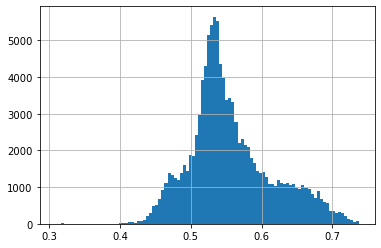

In [117]:
(irrig_grids['mean']).hist(bins=100)

In [1]:


plt.rcParams.update({
    "figure.facecolor":  (1, 1, 1, 0),  # red   with alpha = 30%
    "axes.facecolor":    (1, 1.0, 1, 1),  # green with alpha = 50%
    "savefig.facecolor": (1, 1, 1, 0),  # blue  with alpha = 20%
})
metric_props = {'mean': {'label': r'Mean [mm]', 'min': 0.1, 'max': 0.7, 'cmap': 'viridis'},
                'sd': {'label': r'Standard Deviation [mm]', 'min': 0, 'max': 0.1, 'cmap': 'YlOrRd'}}
month = 1
stage = 1
metric = 'sd'
# for stage in [1, 4]:#range(1,5):
#     for init in [0.125, 0.35]:#, 150, 175, 200, 225, 250, 275, 300, 325, 350]:
#         for metric in ['mean', 'sd']:
fig, ax = plt.subplots(figsize = (20,10),facecolor=(1,1,1,0))

cm1 = plt.cm.get_cmap(metric_props[metric]['cmap']).reversed()

# irrig_grids = get_subset(stage, init=init)

# for i in range(3):
# a = irrig_grids.plot(ax=ax, column = metric,edgecolor = 'none',vmin= metric_props[metric]['min'], vmax = metric_props[metric]['max'], cmap = cm1)
world.plot(ax=ax, facecolor="none", edgecolor="black", zorder = 1, alpha=0.5)
world_states.plot(ax=ax, facecolor="none", edgecolor="black", zorder = 1, alpha=0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_ylim([-60,60])

cax = fig.add_axes([0.95, 0.15, 0.03, 0.70])
fig.colorbar( a.collections[0], cax=cax, orientation='vertical')
cax.tick_params(labelsize=24)

fig.tight_layout()
cax.text(3.2,0.35, metric_props[metric]['label'], fontsize=26, transform=cax.transAxes, rotation=90)
fn_out = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/figures/agufihm_v0/maps/{metric}/{metric}_{month}_{stage}_{init_cond}.jpg'.format(month=str(month).zfill(2), \
    stage=str(stage).zfill(2), init_cond=str(init).zfill(3), metric=metric)
# fn_out = os.path.join('irr'+ str(year) + '.png')
# fig.savefig(fn_out, dpi=300, bbox_inches='tight')
# plt.close(fig)

NameError: name 'plt' is not defined

# unified plot with GPM rianfall analysis

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [3]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib import ticker
import pandas as pd
import geopandas as gpd
import numpy as np
import sys

import warnings
warnings.filterwarnings("ignore")

#TODO:change for simulations on HPC
# month = int(str(sys.argv[1]))
month = 1

###############################################################################
path_out_fmt = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/figures/agufihm_v0/maps/{metric}/'
fn_out_fmt = '{metric}_{month}_{stage}_{init_cond}.jpg'
###############################################################################
fn_fmt = '/storage/coda1/p-rbras6/0/njadidoleslam3/gpm/gpm_condsm_monthly_v1/{month}.hdf'
top_layer_depth = 1000

###############################################################################
def smvol2cb(x, theta_r):
    return  x * (top_layer_depth + theta_r * top_layer_depth) - theta_r * top_layer_depth

def myround5(x, base=5):
    return base * np.round(x/base)

def myround25(x, base=0.025):
    return base * np.round(x/base)
###############################################################################
lakes =        gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/smap_gw/data/gis_data/coastlines_boundariesetc/GSHHS_shp/l/GSHHS_l_L2.shp')
world =        gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/smap_gw/data/gis_data/coastlines_boundariesetc/GSHHS_shp/l/GSHHS_l_L1.shp')
world_states = gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/smap_gw/data/gis_data/coastlines_boundariesetc/WDBII_shp/l/WDBII_border_l_L1.shp')

s_props = pd.read_csv('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/model_simulations/soil_props/smap_sprops_montzka_30cm_v1.csv')
modeled_grid = gpd.read_file('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/model_simulations/postprocess/modeled_grids/smap_grid_60NS.shp')

fn = fn_fmt.format(month=str(month))
data = pd.read_hdf(fn)
merged = pd.merge(modeled_grid, data, on='grid_xy')
merged_w_sprops  = pd.merge(merged, s_props, on='grid_xy')

merged_w_sprops['init_v0'] = np.around(
    myround25(
        smvol2cb(
            merged_w_sprops['init'], merged_w_sprops['theta_r'])/1000
    ),
    3)


In [148]:


def get_subset(stage, init):
    idx = (merged_w_sprops['stage'] == stage) & (merged_w_sprops['init_v0'] == init)
    return merged_w_sprops[idx]

    

metric_props = {'mean': {'label': r'Mean $[cm^3/cm^3]$', 'min': 0, 'max': 1, 'cmap': 'rainbow', 'nbins': 20},
                'sd': {'label': r'Standard Deviation $[cm^3/cm^3]$', 'min': 0, 'max': 0.25, 'cmap': 'YlOrRd', 'nbins':10}}

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


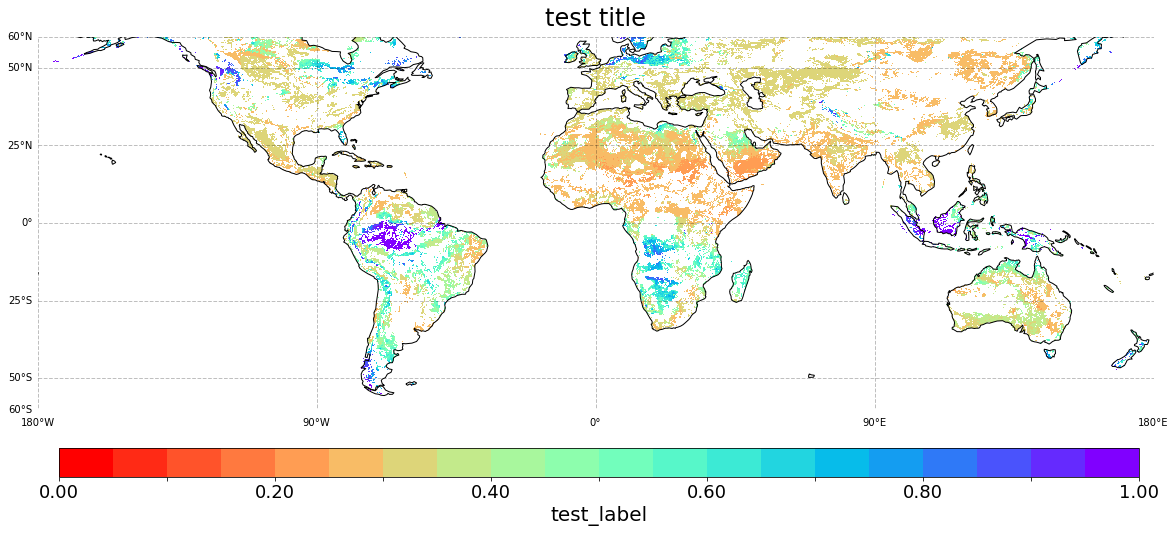

In [150]:
""".0 775324.0
0.075 1608725.0
0.15 1618144.0
0.225 1629066.0
0.3 1604040.0
0.375 1602634.0
0.45 1614081.0
0.525 1615290.0
0.6 1611301.0
0.675 1607239.0
0.75 1610123.0
0.825 1618516.0
0.9 1617668.0
0.975 1344356.0
"""
from matplotlib import ticker
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-170,170,-60,60])
metric = 'mean'

if metric == 'mean':
    cm1 = plt.cm.get_cmap(metric_props[metric]['cmap'], metric_props[metric]['nbins']-0).reversed()
else:
    cm1 = plt.cm.get_cmap(metric_props[metric]['cmap'], metric_props[metric]['nbins']-0)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--', alpha=0.25)
gl.xlabels_top=False
gl.ylabels_right=False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# world.plot(ax=ax, facecolor="none", edgecolor="black", zorder = 1, alpha=0.5)

irrig_grids = get_subset(1, 0.15)
a = irrig_grids.plot(ax=ax, column = metric,edgecolor = 'none',vmin= metric_props[metric]['min'], vmax = metric_props[metric]['max'], cmap = cm1)
###############################################################################
# x, y = np.float32(np.meshgrid(np.arange(-180,180,2), np.arange(-90,90,2)))
# precip = np.random.uniform( size=(180//2,360//2))

x_d = np.linspace(metric_props[metric]['min'],\
     metric_props[metric]['max'],\
     metric_props[metric]['nbins']+1)

x_d = np.linspace(-1, 1, 21)


# a = ax.contourf(x, y, precip, x_d, cmap=cm1,  extend="max")
ax.coastlines(resolution="110m",linewidth=1)
ax.set_axis_off()
ax.set_xlim([-180, 180])
ax.set_ylim([-60, 60])

###############################################################################


# cax = fig.add_axes([0.91, 0.25, 0.02, 0.5])
# fig.colorbar( a.collections[3], cax=cax, orientation='vertical')
# cax.tick_params(labelsize=22)

# if metric == 'sd':
#     cax.text(3.3,0.10, metric_props[metric]['label'], fontsize=22, transform=cax.transAxes, rotation=90)
# else:
#     cax.text(3.3,0.25, metric_props[metric]['label'], fontsize=22, transform=cax.transAxes, rotation=90)

# ax.set_title(r'{month}, Stage = +{stage} [days], $\theta_i\ =\ {init}\ [cm^3/cm^3]$'.format(month=months[month-1], stage=str(int(stage*8)), init=str(init)), fontsize=24)
ax.set_title('test title', fontsize=24)

# ax.text(0.44,-0.1, 'testMonth',transform=ax.transAxes, fontsize=30)
cax = fig.add_axes([0.14, 0.15, 0.75, 0.04])
fig.colorbar(a.collections[0], cax=cax, orientation='horizontal')
cax.set_xlabel('test_label', fontsize=20)

cax.tick_params(labelsize=18)

labels = []
for i,x1 in enumerate(x_d):
    if i%2==0:

        labels.append('{:.2f}'.format(x1))
    else:
        labels.append('')
cax.xaxis.set_major_locator(ticker.FixedLocator(x_d))
cax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}

# path_out = path_out_fmt.format(metric=metric)
# if os.path.exists(path_out) == False:
#     os.makedirs(path_out_fmt.format(metric=metric))

# fn_out = os. fn_out_fmt.format(month=str(month).zfill(2), \
#     stage=str(int(stage*8)).zfill(2), init_cond=str(int(init*1000)).zfill(3), metric=metric)
# plt.savefig(path_out + fn_out, dpi=500, bbox_inches='tight')
# # fig.savefig(fn_out, dpi=500, bbox_inches='tight')
# plt.close(fig)

NameError: name 'stage' is not defined

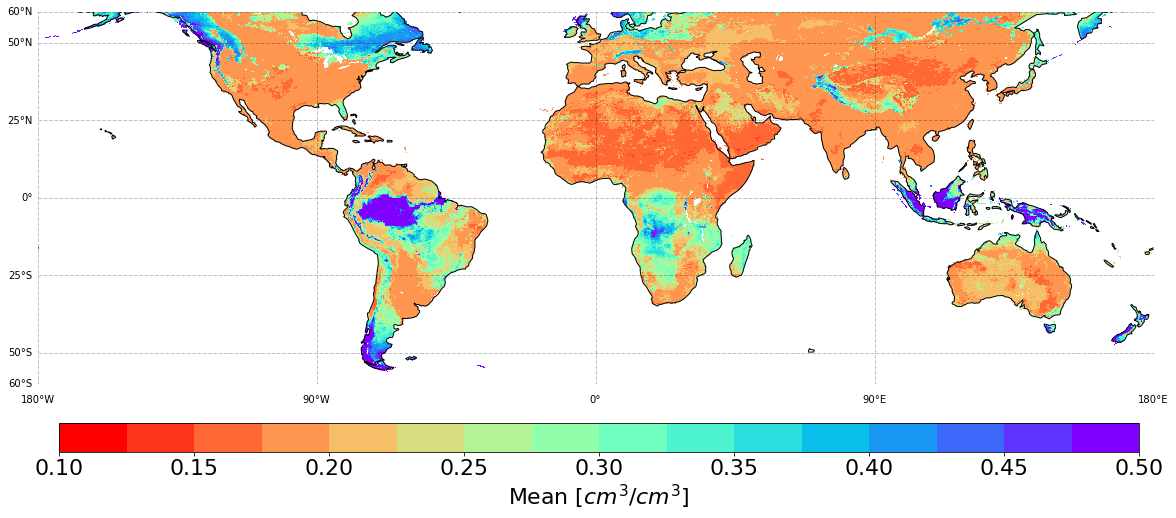

In [158]:
fn = fn_fmt.format(month=str(1))
data = pd.read_hdf(fn)
merged = pd.merge(modeled_grid, data, on='grid_xy')
merged_w_sprops  = pd.merge(merged, s_props, on='grid_xy')

merged_w_sprops['init_v0'] = np.around(
    myround25(
        smvol2cb(
            merged_w_sprops['init'], merged_w_sprops['theta_r'])/1000
    ),
    3)


def get_subset(stage, init):
    idx = (merged_w_sprops['stage'] == stage) & (merged_w_sprops['init_v0'] == init)
    return merged_w_sprops[idx]

    


AttributeError: module 'os' has no attribute 'fn_out_fmt'

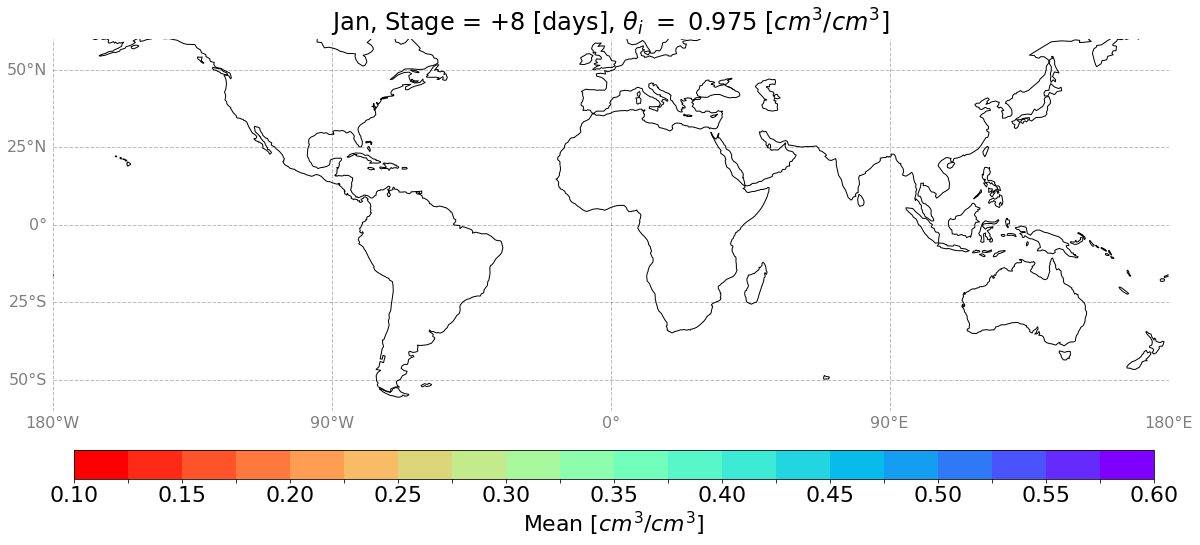

In [164]:

metric_props = {'mean': {'label': r'Mean $[cm^3/cm^3]$', 'min': 0.1, 'max': 0.6, 'cmap': 'rainbow', 'nbins':20},
                'sd': {'label': r'Standard Deviation $[cm^3/cm^3]$', 'min': 0, 'max': 0.1, 'cmap': 'YlOrRd', 'nbins':10}}

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-170,170,-60,60])
irrig_grids = get_subset(stage=1, init=0.125)
if metric == 'mean':
    cm1 = plt.cm.get_cmap(metric_props[metric]['cmap'], metric_props[metric]['nbins']-0).reversed()
else:
    cm1 = plt.cm.get_cmap(metric_props[metric]['cmap'], metric_props[metric]['nbins']-0)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--', alpha=0.25)
gl.xlabels_top=False
gl.ylabels_right=False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# a = irrig_grids.plot(ax=ax, column = metric,edgecolor = 'none',vmin= metric_props[metric]['min'], vmax = metric_props[metric]['max'], cmap = cm1)

x_d = np.linspace(metric_props[metric]['min'],\
        metric_props[metric]['max'],\
        metric_props[metric]['nbins']+1)

ax.coastlines(resolution="110m",linewidth=1)
ax.set_axis_off()
ax.set_xlim([-180, 180])
ax.set_ylim([-60, 60])


cax = fig.add_axes([0.14, 0.15, 0.75, 0.04])
fig.colorbar( a.collections[0], cax=cax, orientation='horizontal')
cax.tick_params(labelsize=22)

cax.set_xlabel(metric_props[metric]['label'], fontsize=22)


ax.set_title(r'{month}, Stage = +{stage} [days], $\theta_i\ =\ {init}\ [cm^3/cm^3]$'.format(month=months[month-1], stage=str(int(stage*8)), init=str(init)), fontsize=24)

labels = []
for i,x1 in enumerate(x_d):
    if i%2==0:

        labels.append('{:.2f}'.format(x1))
    else:
        labels.append('')
cax.xaxis.set_major_locator(ticker.FixedLocator(x_d))
cax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))

gl.xlabel_style = {'size':16, 'color':'black', 'alpha' : 0.5}
gl.ylabel_style = {'size':16, 'color':'black', 'alpha' : 0.5}



path_out = path_out_fmt.format(metric=metric)
if os.path.exists(path_out) == False:
    os.makedirs(path_out_fmt.format(metric=metric))

fn_out = os. fn_out_fmt.format(month=str(month).zfill(2), \
    stage=str(int(stage*8)).zfill(2), init_cond=str(int(init*1000)).zfill(3), metric=metric)
# plt.savefig(path_out + fn_out, dpi=500, bbox_inches='tight')
# # fig.savefig(fn_out, dpi=500, bbox_inches='tight')
# plt.close(fig)

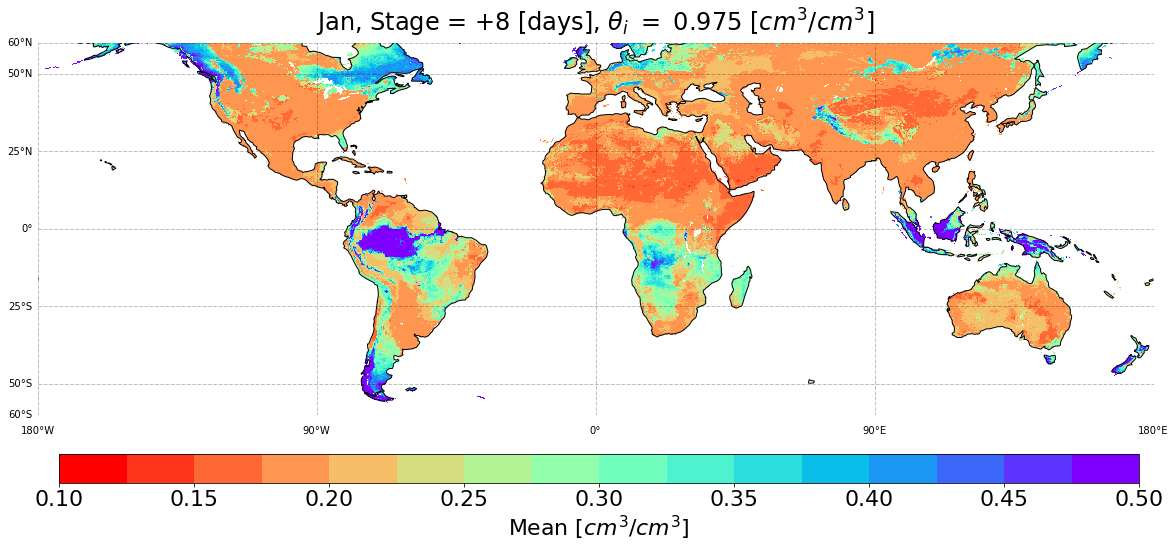

In [161]:
ax.set_title(r'{month}, Stage = +{stage} [days], $\theta_i\ =\ {init}\ [cm^3/cm^3]$'.format(month=months[month-1], stage=str(int(1*8)), init=str(init)), fontsize=24)
fig

In [23]:
labels = []
for i,x1 in enumerate(x_d):
    if i%2==0:

        labels.append(str(x1))
    else:
        labels.append('')

In [24]:
labels

['-1.0',
 '',
 '-0.7894736842105263',
 '',
 '-0.5789473684210527',
 '',
 '-0.368421052631579',
 '',
 '-0.1578947368421053',
 '',
 '0.05263157894736836',
 '',
 '0.26315789473684204',
 '',
 '0.4736842105263157',
 '',
 '0.6842105263157894',
 '',
 '0.894736842105263',
 '']

# plot lines for initial conditions vs mean and sd

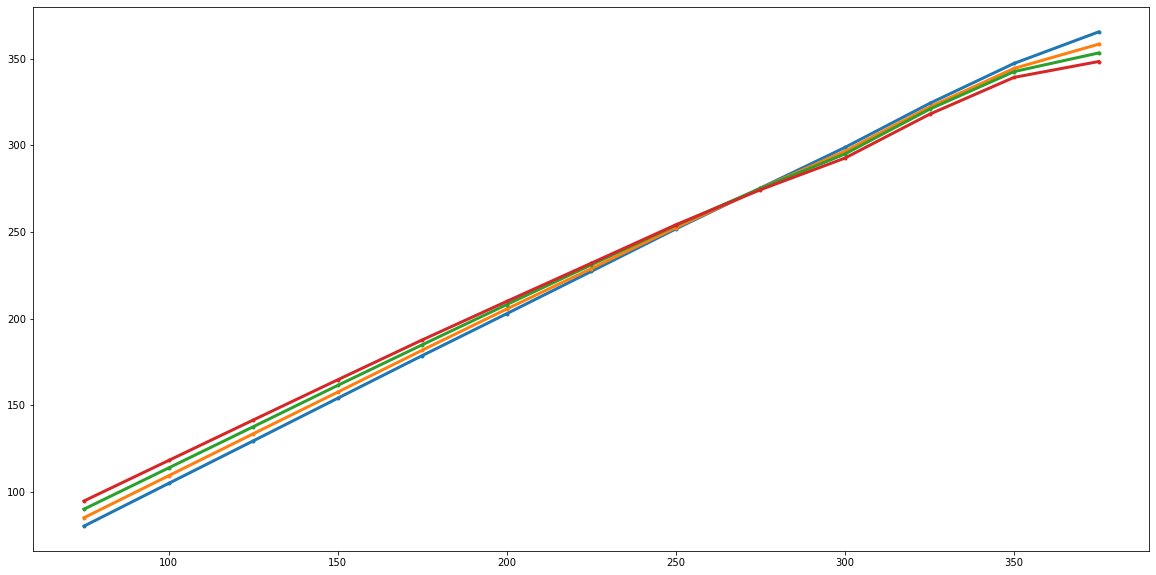

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
for ds in range(1,5):
    for month in range(1,2):
        idx_month = np.in1d(subset['month'],month)
        idx_ds = np.in1d(subset['stage'],ds)
                
        ax.plot(subset['init_v0'][idx_month & idx_ds], subset['mean'][idx_month & idx_ds],  marker='.', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

In [41]:
subset

,grid_xy,geometry,month,stage,init,mean,sd,n,theta_s,theta_r,mean_L,k_s,var_scaling,psi_s,init_v0


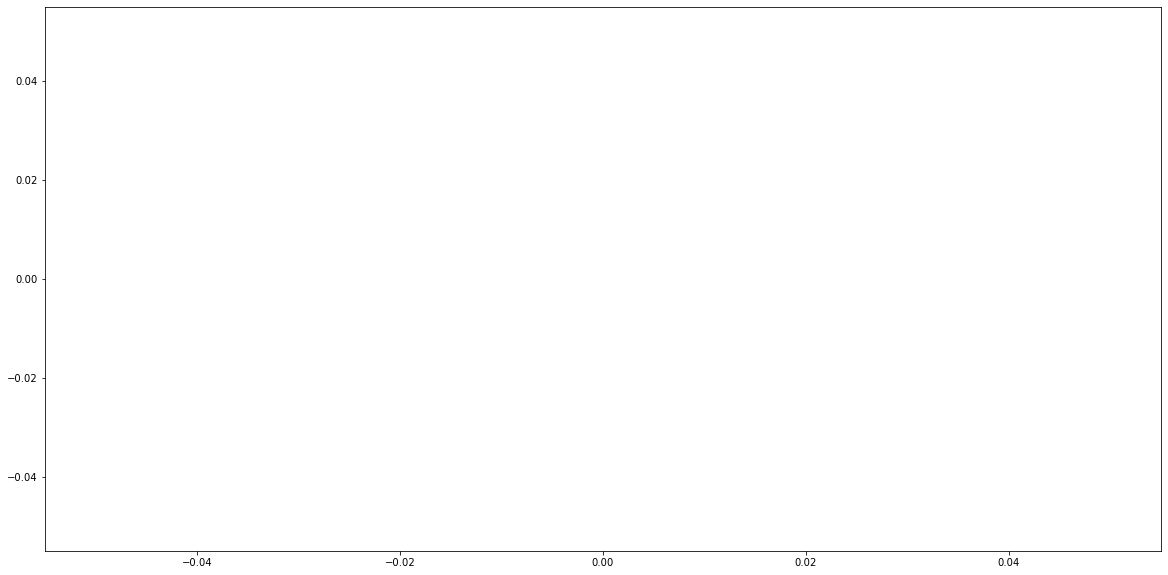

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    for month in range(1,2):
        idx_month = np.in1d(subset['month'],month)
        idx_ds = np.in1d(subset['stage'],ds)
                
        ax.scatter(subset['init_v0'][idx_month & idx_ds], subset['sd'][idx_month & idx_ds],  marker='.', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

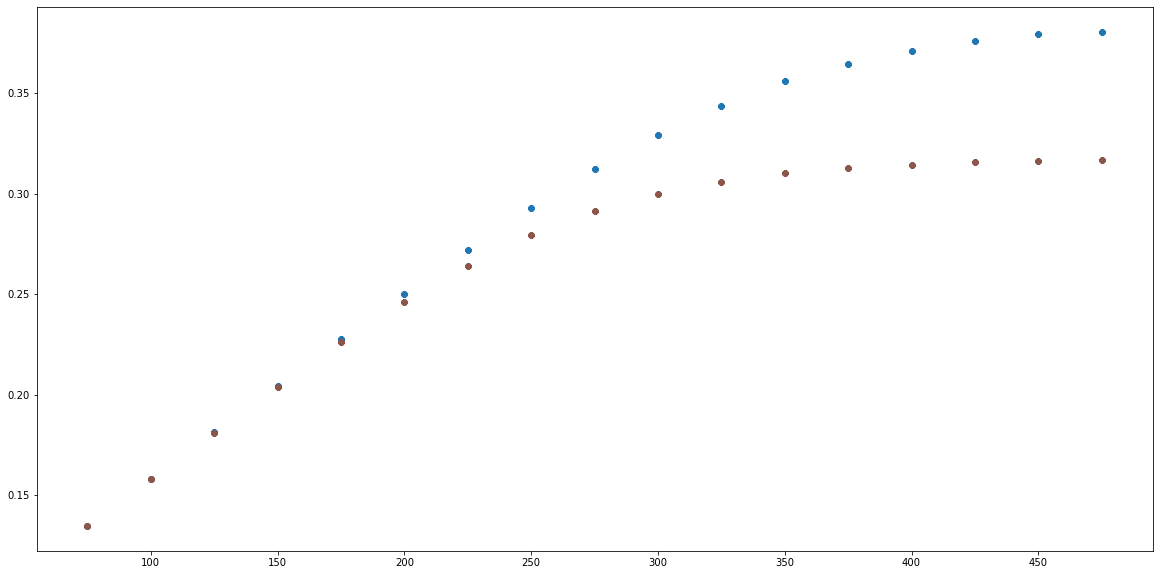

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    for month in range(1,6):
        idx_month = np.in1d(subset['month'],month)
        idx_ds = np.in1d(subset['stage'],ds)
                
        ax.scatter(subset['init_v0'][idx_month & idx_ds], subset['mean'][idx_month & idx_ds],  marker='.', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

In [35]:
subset['sd']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1355    0.2
1356    0.0
1357    0.0
1358    0.0
1359    0.0
Name: sd, Length: 1360, dtype: float64